<a href="https://colab.research.google.com/github/mille055/AIPI531/blob/main/AIPI531_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 531
**Homework 3**

Chad Miller


1. Build a pipeline for offline RL using d3rlpy:
Hint: In this homework, you will implement a simple pipeline for offline RL using the APIs provided in d3rlpy repository.
[Required] Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include different dataset sizes, task difficulties) plots.
[Optional] Train OPE (FQE):
- Train OPE (FQE) to evaluate the trained policy.
- Generate estimated Q vs training steps (may include different trained policies) plots.
  
 - Include the true Q in the same plots. [Requirements]:
- Build a pipeline for offline RL (data processing, training, evaluation).
- Compare the true Q value with estimated Q value for both offline RL training and offline evaluation (optional).
[Software Setup for Development]:
1. git clone the d3rlpy source code repo (development version) to your local machine (no need to install it on your local machine). https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht ml#install-from-source
2. Download the Google Drive Desktop (to sync with your Google Drive). https://www.google.com/drive/download/
3. Sync the cloned d3rlpy code repo (on your local machine) with the one in your Google Drive using Google Drive Desktop.
4. Connect the cloned d3rlpy code repo stored in your Google Drive with your Google Colab notebook.
5. Install the cloned d3rlpy code repo in your Google Drive using Google Colab (install it on Colab).
   
https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht
ml#install-from-source
6. Use any editor (e.g. Sublime, PyCharm, etc.) for the code implementation (modify the code in the cloned d3rlpy repo on your local machine).
7. Test your implementation and running experiments using Colab.
8. Push your code in the cloned d3rlpy repo on your local machine to your repo in your GitHub account.
[Submission]:
(We don’t need a link to your Google Drive. We only need the link to your GitHub using the Colab notebook)
1. Create a new Colab notebook.
2. !pip install git+”your github URL”
3. Training/testing experiments using the Colab notebook.

# Setup

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
# installing my fork of the d3rlpy repo which contains modifications for this homework assignment
!pip install git+'https://github.com/mille055/AIPI531-d3rlpy.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mille055/AIPI531-d3rlpy.git to /tmp/pip-req-build-ehnko3_5
  Running command git clone --filter=blob:none --quiet https://github.com/mille055/AIPI531-d3rlpy.git /tmp/pip-req-build-ehnko3_5
  Resolved https://github.com/mille055/AIPI531-d3rlpy.git to commit bdbbb37bf7fe9411a23907b06aff7405de749a08
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 4.0 MB/s eta 0:00:00
  Created wheel for d3rlpy: filename=d3rlpy-1.1.1-cp39-cp39-linux_x86_64.whl size=1258801 sha256=e006b501d7cdeb2a66c2705e1e6c0cb46d4e941adfc89fba34a0347760e57b50
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzhed___/wheels/c7/1d/0b/17e98dce5ba7216cdb795e775bd7691f7dee958f7153c023d2
Successfully built d3rlpy


In [3]:
!pip install -e .[all]
!pip install gym[all]
!pip install -e .[docs,tests,extra] 
!pip install --upgrade gym==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.2 MB/s

In [4]:
import d3rlpy
from d3rlpy.algos import CQL
from d3rlpy.algos.cql import DiscreteCQL

from d3rlpy.dataset import MDPDataset
from d3rlpy.datasets import get_atari, get_cartpole

from d3rlpy.metrics import initial_state_value_estimation_scorer
#import true_q_scorer which was added to the repo for this homework assignment
from d3rlpy.metrics.scorer import average_value_estimation_scorer, true_q_scorer
from d3rlpy.ope import FQE,DiscreteFQE


from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import gym
import shutil


In [5]:


shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)


# prepare dataset
dataset, env = get_cartpole()

# split dataset
train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

# prepare algorithm
cql = DiscreteCQL(use_gpu=True)

# train
results = cql.fit(
    train_episodes,
    eval_episodes=test_episodes,
    n_epochs=100,
    scorers={
        "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer
    },
    experiment_name = "CQL-cartpole",
    with_timestamp = False
)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


2023-03-23 10:27:41 [debug    ] RoundIterator is selected.
2023-03-23 10:27:41 [info     ] Directory is created at d3rlpy_logs/CQL-cartpole
2023-03-23 10:27:41 [debug    ] Building models...
2023-03-23 10:27:48 [debug    ] Models have been built.
2023-03-23 10:27:48 [info     ] Parameters are saved to d3rlpy_logs/CQL-cartpole/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': 0, 'algorithm': 'DiscreteCQL', 'observation_shape': (4,), 'action_size': 2

Epoch 1/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:28:08 [info     ] CQL-cartpole: epoch=1 step=2494 epoch=1 metrics={'time_sample_batch': 0.0001662116865205497, 'time_algorithm_update': 0.007352705563940616, 'loss': 0.6880969136547067, 'time_step': 0.007616558453514753, 'estimated_q': 0.8919576406478882, 'true_q': 1.8218070268630981} step=2494
2023-03-23 10:28:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_2494.pt


Epoch 2/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:28:22 [info     ] CQL-cartpole: epoch=2 step=4988 epoch=2 metrics={'time_sample_batch': 0.00013304951674668618, 'time_algorithm_update': 0.005143419015665673, 'loss': 0.6687188574143572, 'time_step': 0.005353903139507474, 'estimated_q': 0.9016814231872559, 'true_q': 1.8031500577926636} step=4988
2023-03-23 10:28:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_4988.pt


Epoch 3/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:28:37 [info     ] CQL-cartpole: epoch=3 step=7482 epoch=3 metrics={'time_sample_batch': 0.00012452103370843933, 'time_algorithm_update': 0.005267824090377942, 'loss': 0.6668147898093165, 'time_step': 0.005472938251571839, 'estimated_q': 0.9029327034950256, 'true_q': 1.8073062896728516} step=7482
2023-03-23 10:28:37 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_7482.pt


Epoch 4/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:28:52 [info     ] CQL-cartpole: epoch=4 step=9976 epoch=4 metrics={'time_sample_batch': 0.00013790708020293627, 'time_algorithm_update': 0.005282356821257493, 'loss': 0.676439620679918, 'time_step': 0.005506553550481605, 'estimated_q': 1.9640333652496338, 'true_q': 2.7925708293914795} step=9976
2023-03-23 10:28:52 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_9976.pt


Epoch 5/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:29:08 [info     ] CQL-cartpole: epoch=5 step=12470 epoch=5 metrics={'time_sample_batch': 0.00017362761325423202, 'time_algorithm_update': 0.005847915325914274, 'loss': 0.6742430124267541, 'time_step': 0.006127408340441865, 'estimated_q': 1.9646289348602295, 'true_q': 2.7790703773498535} step=12470
2023-03-23 10:29:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_12470.pt


Epoch 6/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:29:23 [info     ] CQL-cartpole: epoch=6 step=14964 epoch=6 metrics={'time_sample_batch': 0.00014234621618495718, 'time_algorithm_update': 0.005282626786801752, 'loss': 0.6736299390303391, 'time_step': 0.005515984467917093, 'estimated_q': 1.964660406112671, 'true_q': 2.789198637008667} step=14964
2023-03-23 10:29:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_14964.pt


Epoch 7/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:29:38 [info     ] CQL-cartpole: epoch=7 step=17458 epoch=7 metrics={'time_sample_batch': 0.00012827062950960234, 'time_algorithm_update': 0.005321707932014129, 'loss': 0.6830835994138847, 'time_step': 0.005540897393092788, 'estimated_q': 2.998856782913208, 'true_q': 3.7314348220825195} step=17458
2023-03-23 10:29:38 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_17458.pt


Epoch 8/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:29:53 [info     ] CQL-cartpole: epoch=8 step=19952 epoch=8 metrics={'time_sample_batch': 0.0001129317302749744, 'time_algorithm_update': 0.005273850899079177, 'loss': 0.6851024575346264, 'time_step': 0.005478756659109304, 'estimated_q': 3.0006799697875977, 'true_q': 3.755951404571533} step=19952
2023-03-23 10:29:53 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_19952.pt


Epoch 9/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:30:08 [info     ] CQL-cartpole: epoch=9 step=22446 epoch=9 metrics={'time_sample_batch': 0.00011181678404880699, 'time_algorithm_update': 0.005334415814354597, 'loss': 0.6844516695262722, 'time_step': 0.005536430534020174, 'estimated_q': 3.0007667541503906, 'true_q': 3.7053403854370117} step=22446
2023-03-23 10:30:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_22446.pt


Epoch 10/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:30:23 [info     ] CQL-cartpole: epoch=10 step=24940 epoch=10 metrics={'time_sample_batch': 0.00013015388773265799, 'time_algorithm_update': 0.005310901662494626, 'loss': 0.6918286880255702, 'time_step': 0.005530432213184445, 'estimated_q': 4.107260227203369, 'true_q': 4.755788326263428} step=24940
2023-03-23 10:30:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_24940.pt


Epoch 11/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:30:38 [info     ] CQL-cartpole: epoch=11 step=27434 epoch=11 metrics={'time_sample_batch': 0.00014726763834643574, 'time_algorithm_update': 0.005451938010447486, 'loss': 0.698217130056265, 'time_step': 0.005696258261955157, 'estimated_q': 4.048853397369385, 'true_q': 4.703269958496094} step=27434
2023-03-23 10:30:38 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_27434.pt


Epoch 12/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:30:53 [info     ] CQL-cartpole: epoch=12 step=29928 epoch=12 metrics={'time_sample_batch': 0.00014543762757669186, 'time_algorithm_update': 0.005367069695601964, 'loss': 0.6977767671884875, 'time_step': 0.005603165653293001, 'estimated_q': 4.039931774139404, 'true_q': 4.69429349899292} step=29928
2023-03-23 10:30:53 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_29928.pt


Epoch 13/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:31:08 [info     ] CQL-cartpole: epoch=13 step=32422 epoch=13 metrics={'time_sample_batch': 0.00011929102486959914, 'time_algorithm_update': 0.005422721123255628, 'loss': 0.7012039016463227, 'time_step': 0.005634454220127085, 'estimated_q': 5.082611560821533, 'true_q': 5.656161308288574} step=32422
2023-03-23 10:31:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_32422.pt


Epoch 14/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:31:23 [info     ] CQL-cartpole: epoch=14 step=34916 epoch=14 metrics={'time_sample_batch': 0.0001118334179031629, 'time_algorithm_update': 0.005343159199143374, 'loss': 0.707944960358053, 'time_step': 0.005546855754439316, 'estimated_q': 5.10297966003418, 'true_q': 5.684135913848877} step=34916
2023-03-23 10:31:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_34916.pt


Epoch 15/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:31:39 [info     ] CQL-cartpole: epoch=15 step=37410 epoch=15 metrics={'time_sample_batch': 0.00012987025183683025, 'time_algorithm_update': 0.005414176101959889, 'loss': 0.7074650975113023, 'time_step': 0.00563954331918822, 'estimated_q': 5.0915045738220215, 'true_q': 5.669620037078857} step=37410
2023-03-23 10:31:39 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_37410.pt


Epoch 16/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:31:54 [info     ] CQL-cartpole: epoch=16 step=39904 epoch=16 metrics={'time_sample_batch': 0.0001577851097394489, 'time_algorithm_update': 0.005508989358579242, 'loss': 0.7071067116312151, 'time_step': 0.005766255337425299, 'estimated_q': 5.070694446563721, 'true_q': 5.628777027130127} step=39904
2023-03-23 10:31:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_39904.pt


Epoch 17/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:32:09 [info     ] CQL-cartpole: epoch=17 step=42398 epoch=17 metrics={'time_sample_batch': 0.00012459483448753572, 'time_algorithm_update': 0.005441991156736372, 'loss': 0.7199033600574698, 'time_step': 0.0056641747115990975, 'estimated_q': 6.163330078125, 'true_q': 6.638499736785889} step=42398
2023-03-23 10:32:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_42398.pt


Epoch 18/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:32:24 [info     ] CQL-cartpole: epoch=18 step=44892 epoch=18 metrics={'time_sample_batch': 0.0001415425333483466, 'time_algorithm_update': 0.005462508920487539, 'loss': 0.7178670166967005, 'time_step': 0.005698402882004702, 'estimated_q': 6.119185447692871, 'true_q': 6.613760948181152} step=44892
2023-03-23 10:32:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_44892.pt


Epoch 19/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:32:40 [info     ] CQL-cartpole: epoch=19 step=47386 epoch=19 metrics={'time_sample_batch': 0.0001268713782095584, 'time_algorithm_update': 0.005475351307615817, 'loss': 0.7178873810035855, 'time_step': 0.005698591112230143, 'estimated_q': 6.132236480712891, 'true_q': 6.626282691955566} step=47386
2023-03-23 10:32:40 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_47386.pt


Epoch 20/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:32:56 [info     ] CQL-cartpole: epoch=20 step=49880 epoch=20 metrics={'time_sample_batch': 0.0001545651205654802, 'time_algorithm_update': 0.0055277832240798325, 'loss': 0.7278009974296894, 'time_step': 0.005787000812906787, 'estimated_q': 7.196784973144531, 'true_q': 7.596566200256348} step=49880
2023-03-23 10:32:56 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_49880.pt


Epoch 21/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:33:12 [info     ] CQL-cartpole: epoch=21 step=52374 epoch=21 metrics={'time_sample_batch': 0.0001456644789352356, 'time_algorithm_update': 0.005689417828343445, 'loss': 0.7285463614710446, 'time_step': 0.005938443261905967, 'estimated_q': 7.155807018280029, 'true_q': 7.542710304260254} step=52374
2023-03-23 10:33:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_52374.pt


Epoch 22/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:33:27 [info     ] CQL-cartpole: epoch=22 step=54868 epoch=22 metrics={'time_sample_batch': 0.00013483975922095841, 'time_algorithm_update': 0.005487244991464623, 'loss': 0.7280279604812192, 'time_step': 0.005721659209122157, 'estimated_q': 7.145855903625488, 'true_q': 7.532421588897705} step=54868
2023-03-23 10:33:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_54868.pt


Epoch 23/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:33:42 [info     ] CQL-cartpole: epoch=23 step=57362 epoch=23 metrics={'time_sample_batch': 0.00011768040890299805, 'time_algorithm_update': 0.005428133817701791, 'loss': 0.7368605996287146, 'time_step': 0.005648660965700004, 'estimated_q': 8.128826141357422, 'true_q': 8.411080360412598} step=57362
2023-03-23 10:33:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_57362.pt


Epoch 24/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:33:57 [info     ] CQL-cartpole: epoch=24 step=59856 epoch=24 metrics={'time_sample_batch': 0.00013730912181790007, 'time_algorithm_update': 0.0054777149400810484, 'loss': 0.7403855460256027, 'time_step': 0.005718935750060399, 'estimated_q': 8.124693870544434, 'true_q': 8.420284271240234} step=59856
2023-03-23 10:33:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_59856.pt


Epoch 25/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:34:13 [info     ] CQL-cartpole: epoch=25 step=62350 epoch=25 metrics={'time_sample_batch': 0.000160885220445818, 'time_algorithm_update': 0.005575208254785851, 'loss': 0.7399382152457953, 'time_step': 0.0058372127789923355, 'estimated_q': 8.101672172546387, 'true_q': 8.389679908752441} step=62350
2023-03-23 10:34:13 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_62350.pt


Epoch 26/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:34:29 [info     ] CQL-cartpole: epoch=26 step=64844 epoch=26 metrics={'time_sample_batch': 0.00013072574817379093, 'time_algorithm_update': 0.005463293292757599, 'loss': 0.7456913109339994, 'time_step': 0.005694733969956851, 'estimated_q': 9.127228736877441, 'true_q': 9.3540678024292} step=64844
2023-03-23 10:34:29 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_64844.pt


Epoch 27/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:34:44 [info     ] CQL-cartpole: epoch=27 step=67338 epoch=27 metrics={'time_sample_batch': 0.0001394949441158781, 'time_algorithm_update': 0.005392720246181167, 'loss': 0.7516658754949104, 'time_step': 0.005634211690882826, 'estimated_q': 9.11235237121582, 'true_q': 9.33701229095459} step=67338
2023-03-23 10:34:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_67338.pt


Epoch 28/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:34:59 [info     ] CQL-cartpole: epoch=28 step=69832 epoch=28 metrics={'time_sample_batch': 0.00013139005078252258, 'time_algorithm_update': 0.005432669506516568, 'loss': 0.7508817256309552, 'time_step': 0.005663652370333576, 'estimated_q': 9.097237586975098, 'true_q': 9.286592483520508} step=69832
2023-03-23 10:34:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_69832.pt


Epoch 29/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:35:14 [info     ] CQL-cartpole: epoch=29 step=72326 epoch=29 metrics={'time_sample_batch': 0.0001431025785738311, 'time_algorithm_update': 0.0054718468221742434, 'loss': 0.7535398618498131, 'time_step': 0.0057115056749908275, 'estimated_q': 10.117818832397461, 'true_q': 10.244999885559082} step=72326
2023-03-23 10:35:14 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_72326.pt


Epoch 30/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:35:30 [info     ] CQL-cartpole: epoch=30 step=74820 epoch=30 metrics={'time_sample_batch': 0.0001628914162361249, 'time_algorithm_update': 0.005461626657028627, 'loss': 0.7604454615016699, 'time_step': 0.005727355061479827, 'estimated_q': 10.081603050231934, 'true_q': 10.203423500061035} step=74820
2023-03-23 10:35:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_74820.pt


Epoch 31/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:35:45 [info     ] CQL-cartpole: epoch=31 step=77314 epoch=31 metrics={'time_sample_batch': 0.000130446127346256, 'time_algorithm_update': 0.0054796850958535835, 'loss': 0.759570117033092, 'time_step': 0.005719011367179914, 'estimated_q': 10.08530330657959, 'true_q': 10.206689834594727} step=77314
2023-03-23 10:35:45 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_77314.pt


Epoch 32/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:36:00 [info     ] CQL-cartpole: epoch=32 step=79808 epoch=32 metrics={'time_sample_batch': 0.00012579610468199852, 'time_algorithm_update': 0.00542981919041613, 'loss': 0.7590224228100291, 'time_step': 0.005660872413525126, 'estimated_q': 10.08238697052002, 'true_q': 10.241877555847168} step=79808
2023-03-23 10:36:00 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_79808.pt


Epoch 33/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:36:16 [info     ] CQL-cartpole: epoch=33 step=82302 epoch=33 metrics={'time_sample_batch': 0.00013724249080361225, 'time_algorithm_update': 0.005546304829711425, 'loss': 0.7699567873237032, 'time_step': 0.005791891261684293, 'estimated_q': 11.003938674926758, 'true_q': 11.038333892822266} step=82302
2023-03-23 10:36:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_82302.pt


Epoch 34/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:36:31 [info     ] CQL-cartpole: epoch=34 step=84796 epoch=34 metrics={'time_sample_batch': 0.00013938166183190243, 'time_algorithm_update': 0.0054849284882533995, 'loss': 0.7686327731217397, 'time_step': 0.00572728030473209, 'estimated_q': 11.034993171691895, 'true_q': 11.05955982208252} step=84796
2023-03-23 10:36:31 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_84796.pt


Epoch 35/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:36:47 [info     ] CQL-cartpole: epoch=35 step=87290 epoch=35 metrics={'time_sample_batch': 0.0001497970357740413, 'time_algorithm_update': 0.005708886990092139, 'loss': 0.7680743655015109, 'time_step': 0.005974510715977134, 'estimated_q': 11.009543418884277, 'true_q': 11.031233787536621} step=87290
2023-03-23 10:36:47 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_87290.pt


Epoch 36/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:37:03 [info     ] CQL-cartpole: epoch=36 step=89784 epoch=36 metrics={'time_sample_batch': 0.00012354957837530778, 'time_algorithm_update': 0.005456016459461203, 'loss': 0.7766885588717823, 'time_step': 0.0056863717298653, 'estimated_q': 12.019654273986816, 'true_q': 11.987554550170898} step=89784
2023-03-23 10:37:03 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_89784.pt


Epoch 37/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:37:18 [info     ] CQL-cartpole: epoch=37 step=92278 epoch=37 metrics={'time_sample_batch': 0.00013842664915939858, 'time_algorithm_update': 0.005532135366915509, 'loss': 0.7777715674284084, 'time_step': 0.005773175212031092, 'estimated_q': 12.003028869628906, 'true_q': 11.898653030395508} step=92278
2023-03-23 10:37:18 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_92278.pt


Epoch 38/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:37:33 [info     ] CQL-cartpole: epoch=38 step=94772 epoch=38 metrics={'time_sample_batch': 0.00014488316576482778, 'time_algorithm_update': 0.005444046011330514, 'loss': 0.776795145933783, 'time_step': 0.005694287914988893, 'estimated_q': 11.973016738891602, 'true_q': 11.917777061462402} step=94772
2023-03-23 10:37:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_94772.pt


Epoch 39/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:37:49 [info     ] CQL-cartpole: epoch=39 step=97266 epoch=39 metrics={'time_sample_batch': 0.0001478152171840836, 'time_algorithm_update': 0.005454316173636063, 'loss': 0.7831098188040442, 'time_step': 0.005703955339066201, 'estimated_q': 12.951081275939941, 'true_q': 12.781838417053223} step=97266
2023-03-23 10:37:49 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_97266.pt


Epoch 40/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:38:05 [info     ] CQL-cartpole: epoch=40 step=99760 epoch=40 metrics={'time_sample_batch': 0.00014842646353323171, 'time_algorithm_update': 0.005679741035773454, 'loss': 0.7861751198242833, 'time_step': 0.005945294593560189, 'estimated_q': 12.9166898727417, 'true_q': 12.754189491271973} step=99760
2023-03-23 10:38:05 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_99760.pt


Epoch 41/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:38:20 [info     ] CQL-cartpole: epoch=41 step=102254 epoch=41 metrics={'time_sample_batch': 0.00013816987598238702, 'time_algorithm_update': 0.00552207150264272, 'loss': 0.7850485565476926, 'time_step': 0.0057685308295818164, 'estimated_q': 12.934371948242188, 'true_q': 12.794506072998047} step=102254
2023-03-23 10:38:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_102254.pt


Epoch 42/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:38:36 [info     ] CQL-cartpole: epoch=42 step=104748 epoch=42 metrics={'time_sample_batch': 0.0001311533529469751, 'time_algorithm_update': 0.005621098095451055, 'loss': 0.7888830807463303, 'time_step': 0.005861827059564537, 'estimated_q': 13.857917785644531, 'true_q': 13.585429191589355} step=104748
2023-03-23 10:38:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_104748.pt


Epoch 43/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:38:51 [info     ] CQL-cartpole: epoch=43 step=107242 epoch=43 metrics={'time_sample_batch': 0.00012536649237466797, 'time_algorithm_update': 0.0055078884650921, 'loss': 0.7942403352490022, 'time_step': 0.005742368644585874, 'estimated_q': 13.884927749633789, 'true_q': 13.63090705871582} step=107242
2023-03-23 10:38:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_107242.pt


Epoch 44/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:39:07 [info     ] CQL-cartpole: epoch=44 step=109736 epoch=44 metrics={'time_sample_batch': 0.00013898579521760427, 'time_algorithm_update': 0.005437156632124374, 'loss': 0.7931628239302991, 'time_step': 0.005681968920691643, 'estimated_q': 13.91711711883545, 'true_q': 13.69746208190918} step=109736
2023-03-23 10:39:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_109736.pt


Epoch 45/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:39:23 [info     ] CQL-cartpole: epoch=45 step=112230 epoch=45 metrics={'time_sample_batch': 0.00015036946979635893, 'time_algorithm_update': 0.005663677607905702, 'loss': 0.7946110041789657, 'time_step': 0.00593135714435348, 'estimated_q': 14.811665534973145, 'true_q': 14.458253860473633} step=112230
2023-03-23 10:39:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_112230.pt


Epoch 46/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:39:38 [info     ] CQL-cartpole: epoch=46 step=114724 epoch=46 metrics={'time_sample_batch': 0.00013806500622245342, 'time_algorithm_update': 0.005532257922095304, 'loss': 0.8053189958441993, 'time_step': 0.005774200775189311, 'estimated_q': 14.7575044631958, 'true_q': 14.457757949829102} step=114724
2023-03-23 10:39:38 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_114724.pt


Epoch 47/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:39:54 [info     ] CQL-cartpole: epoch=47 step=117218 epoch=47 metrics={'time_sample_batch': 0.0001664233379776992, 'time_algorithm_update': 0.005506378130235955, 'loss': 0.8041779334629261, 'time_step': 0.005780211141229919, 'estimated_q': 14.79606819152832, 'true_q': 14.435161590576172} step=117218
2023-03-23 10:39:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_117218.pt


Epoch 48/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:40:09 [info     ] CQL-cartpole: epoch=48 step=119712 epoch=48 metrics={'time_sample_batch': 0.00015941063881685184, 'time_algorithm_update': 0.005533700861162248, 'loss': 0.8030195362393915, 'time_step': 0.005796154786226935, 'estimated_q': 14.791831970214844, 'true_q': 14.479264259338379} step=119712
2023-03-23 10:40:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_119712.pt


Epoch 49/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:40:25 [info     ] CQL-cartpole: epoch=49 step=122206 epoch=49 metrics={'time_sample_batch': 0.0001363420639405178, 'time_algorithm_update': 0.00558135389038918, 'loss': 0.8136830253298032, 'time_step': 0.005833667856077242, 'estimated_q': 15.70117473602295, 'true_q': 15.2723388671875} step=122206
2023-03-23 10:40:25 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_122206.pt


Epoch 50/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:40:41 [info     ] CQL-cartpole: epoch=50 step=124700 epoch=50 metrics={'time_sample_batch': 0.00013293862438431336, 'time_algorithm_update': 0.0056441012820723346, 'loss': 0.8121270890128832, 'time_step': 0.005891473463466862, 'estimated_q': 15.721156120300293, 'true_q': 15.332155227661133} step=124700
2023-03-23 10:40:41 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_124700.pt


Epoch 51/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:40:56 [info     ] CQL-cartpole: epoch=51 step=127194 epoch=51 metrics={'time_sample_batch': 0.00015574880093694593, 'time_algorithm_update': 0.00553274527490856, 'loss': 0.8111010725582325, 'time_step': 0.005796399800989661, 'estimated_q': 15.716784477233887, 'true_q': 15.350666999816895} step=127194
2023-03-23 10:40:56 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_127194.pt


Epoch 52/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:41:12 [info     ] CQL-cartpole: epoch=52 step=129688 epoch=52 metrics={'time_sample_batch': 0.00012646356198724596, 'time_algorithm_update': 0.005605112483430693, 'loss': 0.8188487179965713, 'time_step': 0.005841237311374692, 'estimated_q': 16.665063858032227, 'true_q': 16.151216506958008} step=129688
2023-03-23 10:41:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_129688.pt


Epoch 53/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:41:27 [info     ] CQL-cartpole: epoch=53 step=132182 epoch=53 metrics={'time_sample_batch': 0.00012857242880961182, 'time_algorithm_update': 0.005509397270398419, 'loss': 0.8200545558569999, 'time_step': 0.005744449501527054, 'estimated_q': 16.627229690551758, 'true_q': 16.158979415893555} step=132182
2023-03-23 10:41:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_132182.pt


Epoch 54/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:41:43 [info     ] CQL-cartpole: epoch=54 step=134676 epoch=54 metrics={'time_sample_batch': 0.0001583350784986996, 'time_algorithm_update': 0.005676419427132932, 'loss': 0.8186941516093473, 'time_step': 0.00594796212845644, 'estimated_q': 16.65766716003418, 'true_q': 16.115753173828125} step=134676
2023-03-23 10:41:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_134676.pt


Epoch 55/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:41:59 [info     ] CQL-cartpole: epoch=55 step=137170 epoch=55 metrics={'time_sample_batch': 0.00015350064948356525, 'time_algorithm_update': 0.005492490678189178, 'loss': 0.8243189333626626, 'time_step': 0.005753652133651036, 'estimated_q': 17.493539810180664, 'true_q': 16.984865188598633} step=137170
2023-03-23 10:41:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_137170.pt


Epoch 56/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:42:14 [info     ] CQL-cartpole: epoch=56 step=139664 epoch=56 metrics={'time_sample_batch': 0.0001364898566924388, 'time_algorithm_update': 0.00554725754805919, 'loss': 0.8291719163907655, 'time_step': 0.005794961737362786, 'estimated_q': 17.543575286865234, 'true_q': 16.992713928222656} step=139664
2023-03-23 10:42:14 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_139664.pt


Epoch 57/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:42:30 [info     ] CQL-cartpole: epoch=57 step=142158 epoch=57 metrics={'time_sample_batch': 0.00013547681672341745, 'time_algorithm_update': 0.005510484302340265, 'loss': 0.8277329534363919, 'time_step': 0.005756156580297107, 'estimated_q': 17.520240783691406, 'true_q': 16.948261260986328} step=142158
2023-03-23 10:42:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_142158.pt


Epoch 58/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:42:45 [info     ] CQL-cartpole: epoch=58 step=144652 epoch=58 metrics={'time_sample_batch': 0.00012988659890059384, 'time_algorithm_update': 0.005528307955266957, 'loss': 0.8305446919003007, 'time_step': 0.005769178689529921, 'estimated_q': 18.409420013427734, 'true_q': 17.79456901550293} step=144652
2023-03-23 10:42:45 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_144652.pt


Epoch 59/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:43:02 [info     ] CQL-cartpole: epoch=59 step=147146 epoch=59 metrics={'time_sample_batch': 0.00015513134079163038, 'time_algorithm_update': 0.005729985504792801, 'loss': 0.8368289983071799, 'time_step': 0.006002542871232021, 'estimated_q': 18.35860252380371, 'true_q': 17.72843360900879} step=147146
2023-03-23 10:43:02 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_147146.pt


Epoch 60/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:43:17 [info     ] CQL-cartpole: epoch=60 step=149640 epoch=60 metrics={'time_sample_batch': 0.00014458213123973122, 'time_algorithm_update': 0.005628421962404595, 'loss': 0.8355102926468791, 'time_step': 0.005889492792039273, 'estimated_q': 18.412017822265625, 'true_q': 17.811113357543945} step=149640
2023-03-23 10:43:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_149640.pt


Epoch 61/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:43:33 [info     ] CQL-cartpole: epoch=61 step=152134 epoch=61 metrics={'time_sample_batch': 0.0001257459163283384, 'time_algorithm_update': 0.005562232605628998, 'loss': 0.8358521158564253, 'time_step': 0.005803206106520884, 'estimated_q': 19.257055282592773, 'true_q': 18.6049861907959} step=152134
2023-03-23 10:43:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_152134.pt


Epoch 62/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:43:48 [info     ] CQL-cartpole: epoch=62 step=154628 epoch=62 metrics={'time_sample_batch': 0.000143509916811823, 'time_algorithm_update': 0.00556472405110155, 'loss': 0.8473807208377453, 'time_step': 0.005821357083110304, 'estimated_q': 19.2995548248291, 'true_q': 18.55426788330078} step=154628
2023-03-23 10:43:48 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_154628.pt


Epoch 63/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:44:05 [info     ] CQL-cartpole: epoch=63 step=157122 epoch=63 metrics={'time_sample_batch': 0.00013074639709643966, 'time_algorithm_update': 0.005630050263791058, 'loss': 0.8461173341072552, 'time_step': 0.005879667537539313, 'estimated_q': 19.226362228393555, 'true_q': 18.51597785949707} step=157122
2023-03-23 10:44:05 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_157122.pt


Epoch 64/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:44:20 [info     ] CQL-cartpole: epoch=64 step=159616 epoch=64 metrics={'time_sample_batch': 0.00016764802940387008, 'time_algorithm_update': 0.005579632190866478, 'loss': 0.8446976621459749, 'time_step': 0.005855237854511717, 'estimated_q': 19.24012565612793, 'true_q': 18.50310516357422} step=159616
2023-03-23 10:44:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_159616.pt


Epoch 65/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:44:36 [info     ] CQL-cartpole: epoch=65 step=162110 epoch=65 metrics={'time_sample_batch': 0.0001334953805209162, 'time_algorithm_update': 0.005530481445569464, 'loss': 0.8574593482896052, 'time_step': 0.005771915627749519, 'estimated_q': 20.094497680664062, 'true_q': 19.324073791503906} step=162110
2023-03-23 10:44:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_162110.pt


Epoch 66/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:44:51 [info     ] CQL-cartpole: epoch=66 step=164604 epoch=66 metrics={'time_sample_batch': 0.00014939724968831446, 'time_algorithm_update': 0.005504991688915702, 'loss': 0.857034050854283, 'time_step': 0.005763335235614057, 'estimated_q': 20.09178352355957, 'true_q': 19.35771942138672} step=164604
2023-03-23 10:44:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_164604.pt


Epoch 67/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:45:07 [info     ] CQL-cartpole: epoch=67 step=167098 epoch=67 metrics={'time_sample_batch': 0.00013957161280089793, 'time_algorithm_update': 0.005599043994496704, 'loss': 0.8561338342684407, 'time_step': 0.005850927200715066, 'estimated_q': 20.10025405883789, 'true_q': 19.381805419921875} step=167098
2023-03-23 10:45:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_167098.pt


Epoch 68/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:45:23 [info     ] CQL-cartpole: epoch=68 step=169592 epoch=68 metrics={'time_sample_batch': 0.000172727568778594, 'time_algorithm_update': 0.005879977271379044, 'loss': 0.8652043024730759, 'time_step': 0.00617175266660493, 'estimated_q': 20.96027183532715, 'true_q': 20.196271896362305} step=169592
2023-03-23 10:45:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_169592.pt


Epoch 69/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:45:39 [info     ] CQL-cartpole: epoch=69 step=172086 epoch=69 metrics={'time_sample_batch': 0.00015222032068247976, 'time_algorithm_update': 0.005613363639966143, 'loss': 0.8676612013062192, 'time_step': 0.00587730524343018, 'estimated_q': 20.90448570251465, 'true_q': 20.07478904724121} step=172086
2023-03-23 10:45:39 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_172086.pt


Epoch 70/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:45:55 [info     ] CQL-cartpole: epoch=70 step=174580 epoch=70 metrics={'time_sample_batch': 0.0001523479424960726, 'time_algorithm_update': 0.005580413408440022, 'loss': 0.8662622583180116, 'time_step': 0.005848061397922641, 'estimated_q': 20.920787811279297, 'true_q': 20.157541275024414} step=174580
2023-03-23 10:45:55 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_174580.pt


Epoch 71/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:46:10 [info     ] CQL-cartpole: epoch=71 step=177074 epoch=71 metrics={'time_sample_batch': 0.00013938271339740768, 'time_algorithm_update': 0.005551090982310181, 'loss': 0.8726655016111773, 'time_step': 0.005803106016604157, 'estimated_q': 21.787431716918945, 'true_q': 20.880889892578125} step=177074
2023-03-23 10:46:10 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_177074.pt


Epoch 72/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:46:26 [info     ] CQL-cartpole: epoch=72 step=179568 epoch=72 metrics={'time_sample_batch': 0.0001475547157293716, 'time_algorithm_update': 0.005638186704089571, 'loss': 0.877997558202472, 'time_step': 0.005905454504843607, 'estimated_q': 21.78772735595703, 'true_q': 20.88694190979004} step=179568
2023-03-23 10:46:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_179568.pt


Epoch 73/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:46:42 [info     ] CQL-cartpole: epoch=73 step=182062 epoch=73 metrics={'time_sample_batch': 0.00013373561544043595, 'time_algorithm_update': 0.0056287375276530376, 'loss': 0.8769969924292568, 'time_step': 0.005874627001685148, 'estimated_q': 21.738971710205078, 'true_q': 20.9017333984375} step=182062
2023-03-23 10:46:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_182062.pt


Epoch 74/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:46:58 [info     ] CQL-cartpole: epoch=74 step=184556 epoch=74 metrics={'time_sample_batch': 0.00013634168155306133, 'time_algorithm_update': 0.005671410151453332, 'loss': 0.8798550250010196, 'time_step': 0.005919070557393163, 'estimated_q': 22.63382911682129, 'true_q': 21.68206024169922} step=184556
2023-03-23 10:46:58 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_184556.pt


Epoch 75/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:47:13 [info     ] CQL-cartpole: epoch=75 step=187050 epoch=75 metrics={'time_sample_batch': 0.00013328927368188535, 'time_algorithm_update': 0.0055863271260510085, 'loss': 0.8898445492567018, 'time_step': 0.005840142631683717, 'estimated_q': 22.661422729492188, 'true_q': 21.688617706298828} step=187050
2023-03-23 10:47:13 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_187050.pt


Epoch 76/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:47:30 [info     ] CQL-cartpole: epoch=76 step=189544 epoch=76 metrics={'time_sample_batch': 0.00015375111326754523, 'time_algorithm_update': 0.005634567693604788, 'loss': 0.8882646418110122, 'time_step': 0.005903106359070363, 'estimated_q': 22.5966796875, 'true_q': 21.676647186279297} step=189544
2023-03-23 10:47:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_189544.pt


Epoch 77/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:47:45 [info     ] CQL-cartpole: epoch=77 step=192038 epoch=77 metrics={'time_sample_batch': 0.00013887796195488313, 'time_algorithm_update': 0.005694382842674959, 'loss': 0.8885952378619453, 'time_step': 0.005948158675609059, 'estimated_q': 23.344139099121094, 'true_q': 22.357847213745117} step=192038
2023-03-23 10:47:45 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_192038.pt


Epoch 78/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:48:01 [info     ] CQL-cartpole: epoch=78 step=194532 epoch=78 metrics={'time_sample_batch': 0.00014324855498533393, 'time_algorithm_update': 0.0056120839803431065, 'loss': 0.901167450554866, 'time_step': 0.005873681166311599, 'estimated_q': 23.394926071166992, 'true_q': 22.41938591003418} step=194532
2023-03-23 10:48:01 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_194532.pt


Epoch 79/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:48:17 [info     ] CQL-cartpole: epoch=79 step=197026 epoch=79 metrics={'time_sample_batch': 0.00015142896984133992, 'time_algorithm_update': 0.0056190211579813035, 'loss': 0.9004512474287388, 'time_step': 0.00587961123098635, 'estimated_q': 23.402122497558594, 'true_q': 22.388212203979492} step=197026
2023-03-23 10:48:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_197026.pt


Epoch 80/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:48:32 [info     ] CQL-cartpole: epoch=80 step=199520 epoch=80 metrics={'time_sample_batch': 0.00014416112265017096, 'time_algorithm_update': 0.005573159136003557, 'loss': 0.898756703151257, 'time_step': 0.005831214649350335, 'estimated_q': 23.38258171081543, 'true_q': 22.378917694091797} step=199520
2023-03-23 10:48:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_199520.pt


Epoch 81/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:48:49 [info     ] CQL-cartpole: epoch=81 step=202014 epoch=81 metrics={'time_sample_batch': 0.00015316950194627262, 'time_algorithm_update': 0.005688917378759805, 'loss': 0.9113788378649744, 'time_step': 0.005961880936274647, 'estimated_q': 24.27549934387207, 'true_q': 23.21189308166504} step=202014
2023-03-23 10:48:49 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_202014.pt


Epoch 82/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:49:04 [info     ] CQL-cartpole: epoch=82 step=204508 epoch=82 metrics={'time_sample_batch': 0.00014539785928122025, 'time_algorithm_update': 0.005596187560196963, 'loss': 0.9118306803268342, 'time_step': 0.005852500342710934, 'estimated_q': 24.233675003051758, 'true_q': 23.178672790527344} step=204508
2023-03-23 10:49:04 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_204508.pt


Epoch 83/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:49:20 [info     ] CQL-cartpole: epoch=83 step=207002 epoch=83 metrics={'time_sample_batch': 0.00012517797535863416, 'time_algorithm_update': 0.005567951879218376, 'loss': 0.9108687819197547, 'time_step': 0.005803270443210434, 'estimated_q': 24.280250549316406, 'true_q': 23.236833572387695} step=207002
2023-03-23 10:49:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_207002.pt


Epoch 84/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:49:36 [info     ] CQL-cartpole: epoch=84 step=209496 epoch=84 metrics={'time_sample_batch': 0.00014255882361074784, 'time_algorithm_update': 0.005630334282074342, 'loss': 0.9206944885809324, 'time_step': 0.005886494300799458, 'estimated_q': 25.093210220336914, 'true_q': 23.966707229614258} step=209496
2023-03-23 10:49:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_209496.pt


Epoch 85/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:49:51 [info     ] CQL-cartpole: epoch=85 step=211990 epoch=85 metrics={'time_sample_batch': 0.000129988600754604, 'time_algorithm_update': 0.005557369019570308, 'loss': 0.9251227879892279, 'time_step': 0.005802880216811118, 'estimated_q': 25.08869171142578, 'true_q': 23.963260650634766} step=211990
2023-03-23 10:49:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_211990.pt


Epoch 86/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:50:07 [info     ] CQL-cartpole: epoch=86 step=214484 epoch=86 metrics={'time_sample_batch': 0.0001390827304378164, 'time_algorithm_update': 0.005735704204800995, 'loss': 0.9241522217905799, 'time_step': 0.005997713700044413, 'estimated_q': 25.070261001586914, 'true_q': 23.93244743347168} step=214484
2023-03-23 10:50:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_214484.pt


Epoch 87/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:50:23 [info     ] CQL-cartpole: epoch=87 step=216978 epoch=87 metrics={'time_sample_batch': 0.00013583148108928226, 'time_algorithm_update': 0.0055915123955574434, 'loss': 0.9306110158120525, 'time_step': 0.005839252433685082, 'estimated_q': 25.897815704345703, 'true_q': 24.71048927307129} step=216978
2023-03-23 10:50:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_216978.pt


Epoch 88/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:50:39 [info     ] CQL-cartpole: epoch=88 step=219472 epoch=88 metrics={'time_sample_batch': 0.0001322340754957895, 'time_algorithm_update': 0.005608962455939176, 'loss': 0.93929002152602, 'time_step': 0.005859721347438687, 'estimated_q': 25.935157775878906, 'true_q': 24.726858139038086} step=219472
2023-03-23 10:50:39 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_219472.pt


Epoch 89/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:50:54 [info     ] CQL-cartpole: epoch=89 step=221966 epoch=89 metrics={'time_sample_batch': 0.0001260070869610992, 'time_algorithm_update': 0.005595012961527588, 'loss': 0.9384849137225529, 'time_step': 0.005834571533233716, 'estimated_q': 25.927900314331055, 'true_q': 24.735322952270508} step=221966
2023-03-23 10:50:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_221966.pt


Epoch 90/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:51:11 [info     ] CQL-cartpole: epoch=90 step=224460 epoch=90 metrics={'time_sample_batch': 0.00018127995103286952, 'time_algorithm_update': 0.005718248408607416, 'loss': 0.9409418809911013, 'time_step': 0.006019247658461117, 'estimated_q': 26.644866943359375, 'true_q': 25.358856201171875} step=224460
2023-03-23 10:51:11 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_224460.pt


Epoch 91/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:51:27 [info     ] CQL-cartpole: epoch=91 step=226954 epoch=91 metrics={'time_sample_batch': 0.00015810143976280376, 'time_algorithm_update': 0.005681820554358536, 'loss': 0.9487174610400448, 'time_step': 0.005960066125406297, 'estimated_q': 26.631511688232422, 'true_q': 25.348237991333008} step=226954
2023-03-23 10:51:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_226954.pt


Epoch 92/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:51:42 [info     ] CQL-cartpole: epoch=92 step=229448 epoch=92 metrics={'time_sample_batch': 0.00016236161841520235, 'time_algorithm_update': 0.005559616597442504, 'loss': 0.948284887416705, 'time_step': 0.005832809396237494, 'estimated_q': 26.685466766357422, 'true_q': 25.400503158569336} step=229448
2023-03-23 10:51:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_229448.pt


Epoch 93/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:51:58 [info     ] CQL-cartpole: epoch=93 step=231942 epoch=93 metrics={'time_sample_batch': 0.00017745435572473546, 'time_algorithm_update': 0.005584291104039098, 'loss': 0.9472498798499417, 'time_step': 0.00586947509548429, 'estimated_q': 26.677845001220703, 'true_q': 25.420602798461914} step=231942
2023-03-23 10:51:58 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_231942.pt


Epoch 94/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:52:14 [info     ] CQL-cartpole: epoch=94 step=234436 epoch=94 metrics={'time_sample_batch': 0.00014546974812303435, 'time_algorithm_update': 0.00577173628803244, 'loss': 0.9612401676660742, 'time_step': 0.0060304105042837675, 'estimated_q': 27.408870697021484, 'true_q': 26.067779541015625} step=234436
2023-03-23 10:52:14 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_234436.pt


Epoch 95/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:52:30 [info     ] CQL-cartpole: epoch=95 step=236930 epoch=95 metrics={'time_sample_batch': 0.00016508890135152491, 'time_algorithm_update': 0.005763164882002206, 'loss': 0.9598647474931925, 'time_step': 0.006050699695932836, 'estimated_q': 27.412565231323242, 'true_q': 26.065399169921875} step=236930
2023-03-23 10:52:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_236930.pt


Epoch 96/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:52:46 [info     ] CQL-cartpole: epoch=96 step=239424 epoch=96 metrics={'time_sample_batch': 0.0001538075154173728, 'time_algorithm_update': 0.005607593030860736, 'loss': 0.958843065878345, 'time_step': 0.005875191787958337, 'estimated_q': 27.386077880859375, 'true_q': 26.034578323364258} step=239424
2023-03-23 10:52:46 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_239424.pt


Epoch 97/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:53:02 [info     ] CQL-cartpole: epoch=97 step=241918 epoch=97 metrics={'time_sample_batch': 0.0001668135643770146, 'time_algorithm_update': 0.0056258604444306476, 'loss': 0.9710014685450694, 'time_step': 0.0059020267836839176, 'estimated_q': 28.2435302734375, 'true_q': 26.80533218383789} step=241918
2023-03-23 10:53:02 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_241918.pt


Epoch 98/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:53:18 [info     ] CQL-cartpole: epoch=98 step=244412 epoch=98 metrics={'time_sample_batch': 0.00013554851437150333, 'time_algorithm_update': 0.005612005495317669, 'loss': 0.9724145756784973, 'time_step': 0.005864131421974017, 'estimated_q': 28.243358612060547, 'true_q': 26.78609848022461} step=244412
2023-03-23 10:53:18 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_244412.pt


Epoch 99/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:53:34 [info     ] CQL-cartpole: epoch=99 step=246906 epoch=99 metrics={'time_sample_batch': 0.0001319466157253972, 'time_algorithm_update': 0.005719266706403963, 'loss': 0.9720014752200248, 'time_step': 0.0059700213916414535, 'estimated_q': 28.246469497680664, 'true_q': 26.796796798706055} step=246906
2023-03-23 10:53:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_246906.pt


Epoch 100/100:   0%|          | 0/2494 [00:00<?, ?it/s]

2023-03-23 10:53:49 [info     ] CQL-cartpole: epoch=100 step=249400 epoch=100 metrics={'time_sample_batch': 0.0001282867853796377, 'time_algorithm_update': 0.005598524329943378, 'loss': 0.9798883703965231, 'time_step': 0.0058406981450610865, 'estimated_q': 29.030893325805664, 'true_q': 27.487667083740234} step=249400
2023-03-23 10:53:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_249400.pt


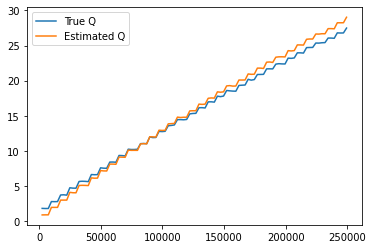

In [6]:
# plotting the true_q versus estimated_q 
true_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole/true_q.csv',header=None)
estimated_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole/estimated_q.csv',header=None)

true_q.columns = ['Index', 'training steps', 'True Q']
estimated_q.columns = ['Index', 'training steps', 'Estimated Q']

plt.plot(true_q['training steps'],true_q['True Q'])
plt.plot(estimated_q['training steps'],estimated_q['Estimated Q'])
plt.legend(['True Q','Estimated Q'])

## Optional Question 2

In [7]:

shutil.rmtree('/content/d3rlpy_logs/FQE_cartpole', ignore_errors=True)

fqe = DiscreteFQE(algo=cql)
result = fqe.fit(train_episodes,
   eval_episodes=test_episodes,
   n_epochs=25,
   scorers={
       "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer

   },
   with_timestamp=False,
   experiment_name=f"FQE_cartpole")

2023-03-23 10:53:50 [debug    ] RoundIterator is selected.
2023-03-23 10:53:50 [info     ] Directory is created at d3rlpy_logs/FQE_cartpole
2023-03-23 10:53:50 [debug    ] Building models...
2023-03-23 10:53:50 [debug    ] Models have been built.
2023-03-23 10:53:50 [info     ] Parameters are saved to d3rlpy_logs/FQE_cartpole/params.json params={'action_scaler': None, 'batch_size': 100, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 100, 'use_gpu': None, 'algorithm': 'DiscreteFQE', 'observation_shape': (4,), 'action_size': 2}


Epoch 1/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:53:54 [info     ] FQE_cartpole: epoch=1 step=798 epoch=1 metrics={'time_sample_batch': 0.00024439935994925054, 'time_algorithm_update': 0.0038915340762986873, 'loss': 0.10536721489394556, 'time_step': 0.004211747556700742, 'estimated_q': 7.208828926086426, 'true_q': 7.6714959144592285} step=798
2023-03-23 10:53:54 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_798.pt


Epoch 2/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:53:58 [info     ] FQE_cartpole: epoch=2 step=1596 epoch=2 metrics={'time_sample_batch': 0.0002548389865043468, 'time_algorithm_update': 0.003958219872381454, 'loss': 0.17396776639505693, 'time_step': 0.004297763183899691, 'estimated_q': 14.345252990722656, 'true_q': 14.148900985717773} step=1596
2023-03-23 10:53:58 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_1596.pt


Epoch 3/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:03 [info     ] FQE_cartpole: epoch=3 step=2394 epoch=3 metrics={'time_sample_batch': 0.0002949626224680353, 'time_algorithm_update': 0.004277142665738749, 'loss': 0.2674543115988439, 'time_step': 0.004663947829626557, 'estimated_q': 20.99383544921875, 'true_q': 20.225648880004883} step=2394
2023-03-23 10:54:03 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_2394.pt


Epoch 4/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:07 [info     ] FQE_cartpole: epoch=4 step=3192 epoch=4 metrics={'time_sample_batch': 0.00024512178617013724, 'time_algorithm_update': 0.003746234384694494, 'loss': 0.35571844420333937, 'time_step': 0.004070408362195008, 'estimated_q': 27.111387252807617, 'true_q': 25.835140228271484} step=3192
2023-03-23 10:54:07 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_3192.pt


Epoch 5/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:12 [info     ] FQE_cartpole: epoch=5 step=3990 epoch=5 metrics={'time_sample_batch': 0.00028181703467118114, 'time_algorithm_update': 0.004024171590207513, 'loss': 0.43721840566900655, 'time_step': 0.004390013546573189, 'estimated_q': 32.94065475463867, 'true_q': 31.15096092224121} step=3990
2023-03-23 10:54:12 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_3990.pt


Epoch 6/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:16 [info     ] FQE_cartpole: epoch=6 step=4788 epoch=6 metrics={'time_sample_batch': 0.00027561755407424203, 'time_algorithm_update': 0.0040831933344217175, 'loss': 0.5127281253719189, 'time_step': 0.004458264599467877, 'estimated_q': 38.259944915771484, 'true_q': 36.008235931396484} step=4788
2023-03-23 10:54:16 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_4788.pt


Epoch 7/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:20 [info     ] FQE_cartpole: epoch=7 step=5586 epoch=7 metrics={'time_sample_batch': 0.00026707093518479424, 'time_algorithm_update': 0.003832843369409853, 'loss': 0.582939205290913, 'time_step': 0.0041850222680801736, 'estimated_q': 43.13663101196289, 'true_q': 40.46910858154297} step=5586
2023-03-23 10:54:20 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_5586.pt


Epoch 8/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:25 [info     ] FQE_cartpole: epoch=8 step=6384 epoch=8 metrics={'time_sample_batch': 0.0002712023288086243, 'time_algorithm_update': 0.004234117672855693, 'loss': 0.6476888360658702, 'time_step': 0.004623235018928547, 'estimated_q': 47.69835662841797, 'true_q': 44.63138961791992} step=6384
2023-03-23 10:54:25 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_6384.pt


Epoch 9/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:29 [info     ] FQE_cartpole: epoch=9 step=7182 epoch=9 metrics={'time_sample_batch': 0.00028232135868311526, 'time_algorithm_update': 0.0040106483569420075, 'loss': 0.709163495872221, 'time_step': 0.004397307720996981, 'estimated_q': 51.87508773803711, 'true_q': 48.41246795654297} step=7182
2023-03-23 10:54:29 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_7182.pt


Epoch 10/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:33 [info     ] FQE_cartpole: epoch=10 step=7980 epoch=10 metrics={'time_sample_batch': 0.0002551990045341931, 'time_algorithm_update': 0.0038202615608846336, 'loss': 0.7628445180621988, 'time_step': 0.004160465453202862, 'estimated_q': 55.7482795715332, 'true_q': 51.91009521484375} step=7980
2023-03-23 10:54:33 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_7980.pt


Epoch 11/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:38 [info     ] FQE_cartpole: epoch=11 step=8778 epoch=11 metrics={'time_sample_batch': 0.0002982759834232187, 'time_algorithm_update': 0.004353823817164677, 'loss': 0.8158459443439097, 'time_step': 0.004771447719487929, 'estimated_q': 59.3338737487793, 'true_q': 55.22017288208008} step=8778
2023-03-23 10:54:38 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_8778.pt


Epoch 12/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:42 [info     ] FQE_cartpole: epoch=12 step=9576 epoch=12 metrics={'time_sample_batch': 0.00025683178339984484, 'time_algorithm_update': 0.003852250283224541, 'loss': 0.8631237610208249, 'time_step': 0.004190349937381601, 'estimated_q': 62.675148010253906, 'true_q': 58.23047637939453} step=9576
2023-03-23 10:54:42 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_9576.pt


Epoch 13/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:46 [info     ] FQE_cartpole: epoch=13 step=10374 epoch=13 metrics={'time_sample_batch': 0.00025788524694610063, 'time_algorithm_update': 0.00375967396231821, 'loss': 0.9057195375079434, 'time_step': 0.004098295269155861, 'estimated_q': 65.6583480834961, 'true_q': 60.95988082885742} step=10374
2023-03-23 10:54:46 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_10374.pt


Epoch 14/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:51 [info     ] FQE_cartpole: epoch=14 step=11172 epoch=14 metrics={'time_sample_batch': 0.0003004695538590128, 'time_algorithm_update': 0.00444976578380231, 'loss': 0.9460381836394656, 'time_step': 0.004874813228023979, 'estimated_q': 68.4360122680664, 'true_q': 63.47829818725586} step=11172
2023-03-23 10:54:51 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_11172.pt


Epoch 15/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:54:56 [info     ] FQE_cartpole: epoch=15 step=11970 epoch=15 metrics={'time_sample_batch': 0.0002582605022535587, 'time_algorithm_update': 0.0039346176281309965, 'loss': 0.9841226623177687, 'time_step': 0.004279752124222299, 'estimated_q': 71.09335327148438, 'true_q': 65.93152618408203} step=11970
2023-03-23 10:54:56 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_11970.pt


Epoch 16/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:00 [info     ] FQE_cartpole: epoch=16 step=12768 epoch=16 metrics={'time_sample_batch': 0.0002529420948267581, 'time_algorithm_update': 0.0038037219441922985, 'loss': 1.0176524295282543, 'time_step': 0.004133294100749463, 'estimated_q': 73.41693115234375, 'true_q': 68.07752227783203} step=12768
2023-03-23 10:55:00 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_12768.pt


Epoch 17/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:05 [info     ] FQE_cartpole: epoch=17 step=13566 epoch=17 metrics={'time_sample_batch': 0.0003234076320676875, 'time_algorithm_update': 0.00474767876149419, 'loss': 1.0477941838235485, 'time_step': 0.005179808850873981, 'estimated_q': 75.64265441894531, 'true_q': 70.12403869628906} step=13566
2023-03-23 10:55:05 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_13566.pt


Epoch 18/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:09 [info     ] FQE_cartpole: epoch=18 step=14364 epoch=18 metrics={'time_sample_batch': 0.00024364257516120013, 'time_algorithm_update': 0.003758421517852554, 'loss': 1.0754096651511655, 'time_step': 0.004071497080618875, 'estimated_q': 77.7138900756836, 'true_q': 72.02082061767578} step=14364
2023-03-23 10:55:09 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_14364.pt


Epoch 19/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:13 [info     ] FQE_cartpole: epoch=19 step=15162 epoch=19 metrics={'time_sample_batch': 0.00023885448474931836, 'time_algorithm_update': 0.003886274526591289, 'loss': 1.1034574661938412, 'time_step': 0.00419635013828899, 'estimated_q': 79.57676696777344, 'true_q': 73.65184020996094} step=15162
2023-03-23 10:55:13 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_15162.pt


Epoch 20/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:18 [info     ] FQE_cartpole: epoch=20 step=15960 epoch=20 metrics={'time_sample_batch': 0.0003828243504191999, 'time_algorithm_update': 0.004760808215702984, 'loss': 1.1275665596778737, 'time_step': 0.00524724246864032, 'estimated_q': 81.49789428710938, 'true_q': 75.40847778320312} step=15960
2023-03-23 10:55:18 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_15960.pt


Epoch 21/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:22 [info     ] FQE_cartpole: epoch=21 step=16758 epoch=21 metrics={'time_sample_batch': 0.0002435344203671716, 'time_algorithm_update': 0.0037942625824968915, 'loss': 1.1497004764250254, 'time_step': 0.004111072772128839, 'estimated_q': 83.25004577636719, 'true_q': 77.08731079101562} step=16758
2023-03-23 10:55:22 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_16758.pt


Epoch 22/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:26 [info     ] FQE_cartpole: epoch=22 step=17556 epoch=22 metrics={'time_sample_batch': 0.00025373174433122604, 'time_algorithm_update': 0.003861019784645329, 'loss': 1.1716950985446648, 'time_step': 0.004193155687853208, 'estimated_q': 84.58880615234375, 'true_q': 78.26459503173828} step=17556
2023-03-23 10:55:26 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_17556.pt


Epoch 23/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:31 [info     ] FQE_cartpole: epoch=23 step=18354 epoch=23 metrics={'time_sample_batch': 0.0003799979848072941, 'time_algorithm_update': 0.00472565073716013, 'loss': 1.1910404741307743, 'time_step': 0.005227246081321162, 'estimated_q': 86.0083236694336, 'true_q': 79.60995483398438} step=18354
2023-03-23 10:55:31 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_18354.pt


Epoch 24/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:35 [info     ] FQE_cartpole: epoch=24 step=19152 epoch=24 metrics={'time_sample_batch': 0.00023549361934040424, 'time_algorithm_update': 0.0037121865384859547, 'loss': 1.2076905184270192, 'time_step': 0.0040233066506254345, 'estimated_q': 87.4737548828125, 'true_q': 80.92930603027344} step=19152
2023-03-23 10:55:35 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_19152.pt


Epoch 25/25:   0%|          | 0/798 [00:00<?, ?it/s]

2023-03-23 10:55:39 [info     ] FQE_cartpole: epoch=25 step=19950 epoch=25 metrics={'time_sample_batch': 0.00023763191729858705, 'time_algorithm_update': 0.003680389925352015, 'loss': 1.2233991683186511, 'time_step': 0.003984156706578152, 'estimated_q': 88.69124603271484, 'true_q': 82.04945373535156} step=19950
2023-03-23 10:55:39 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_19950.pt


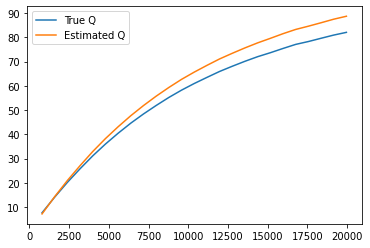

In [8]:
# plotting true_q versus estimated_q for FQE
fqe_true_q = pd.read_csv('/content/d3rlpy_logs/FQE_cartpole/true_q.csv',header=None)
fqe_estimated_q = pd.read_csv('/content/d3rlpy_logs/FQE_cartpole/estimated_q.csv',header=None)

fqe_true_q.columns = ['Index', 'training steps', 'True Q']
fqe_estimated_q.columns = ['Index', 'training steps', 'Estimated Q']

plt.plot(fqe_true_q['training steps'],fqe_true_q['True Q'])
plt.plot(fqe_estimated_q['training steps'],fqe_estimated_q['Estimated Q'])
plt.legend(['True Q','Estimated Q'])